In [120]:
print ("hi")

hi


In [121]:
import numpy as np
from scipy.stats import norm

In [122]:
#custom mean and standard deviation funcitons
def compute_mean(data):
    return sum(data) / len(data)

def compute_std(data):
    mean = compute_mean(data)
    variance = sum((x - mean)**2 for x in data) / len(data)
    return variance ** 0.5

In [123]:
#parameters for normal distribution
mu, sigma = 0,5
#generating samples
samples = norm.rvs(loc=mu, scale=sigma, size=10000)

#using my functions
my_mean = compute_mean(samples)
my_std = compute_std(samples)

#using numpy functions
np_mean = np.mean(samples)
np_std = np.std(samples)

print ("my custom functions mean: {:.5f}, std dev: {:.5f}" .format(my_mean, my_std))
print ("built in numpy mean: {:.5f}, std dev: {:.5f}" .format(np_mean, np_std))

my custom functions mean: -0.01472, std dev: 5.01783
built in numpy mean: -0.01472, std dev: 5.01783


<function matplotlib.pyplot.show(close=None, block=None)>

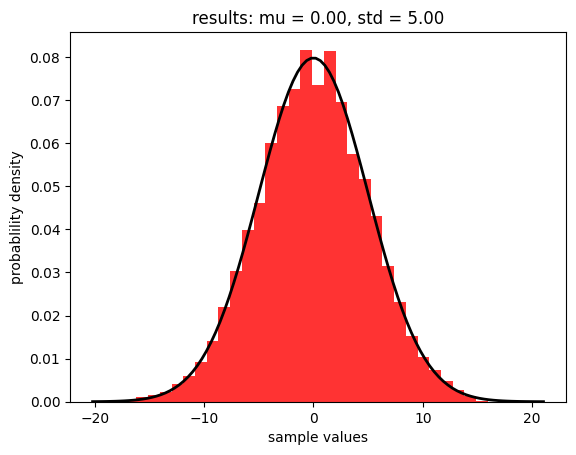

In [124]:
#histogram plot
import matplotlib.pyplot as plt 

plt.hist(samples, bins=35, density=True, alpha=0.8, color = 'r')

#plot the normal distribution curve 
xmin, xmax = plt.xlim()
#linspace generates evenely spaced numbers within the histogram's x axis limits 
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x,p,'k',linewidth=2)


title = "results: mu = %.2f, std = %.2f" % (mu, sigma)
plt.title(title)
plt.ylabel("probablility density")
plt.xlabel("sample values")


plt.show

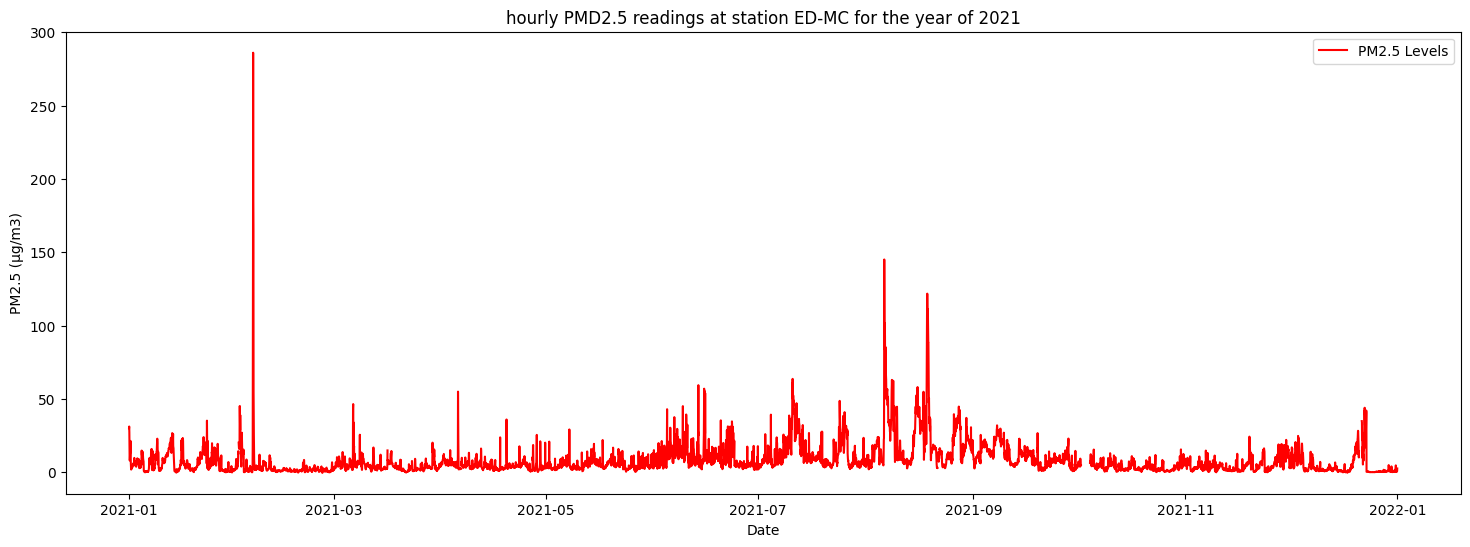

In [125]:
#part 2 reading the csv
#load the data from the csv
import pandas as pd
df = pd.read_csv('2021-PM2.5.csv')

#convert date to datetime objects in a dataframe
df['Date'] = pd.to_datetime(df['Date'])

#print(df.describe())

#filtering the data from a station ED-MC
station_data = df[['Date', 'ED-MC']].copy();

#plot the data from this station
plt.figure(figsize=(18,6))
plt.plot(station_data['Date'], station_data['ED-MC'], label = 'PM2.5 Levels', color = 'r')
plt.title('hourly PMD2.5 readings at station ED-MC for the year of 2021')
plt.xlabel('Date')
plt.ylabel("PM2.5 (µg/m3)")
plt.legend()



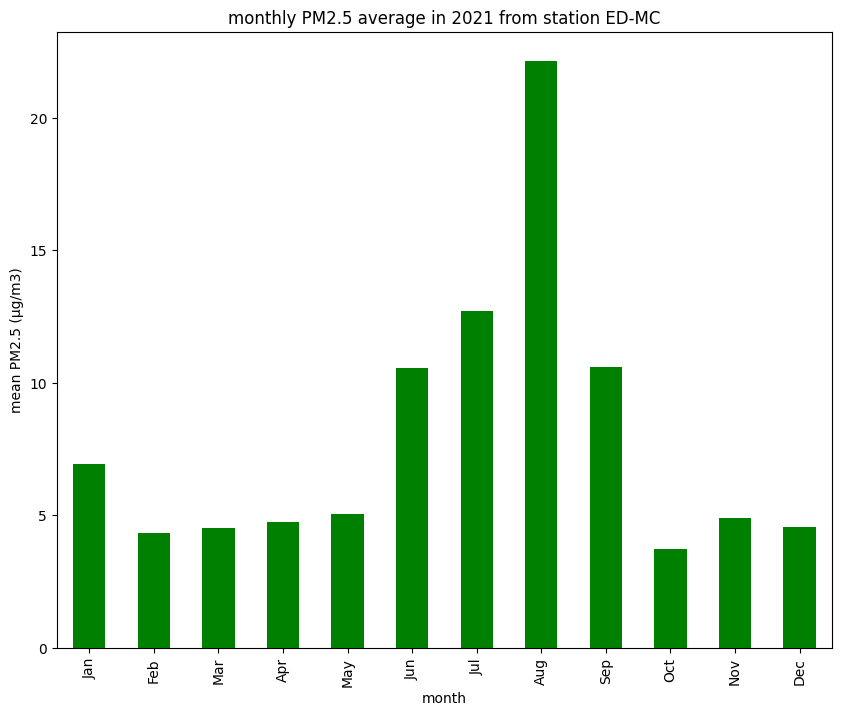

In [126]:
#plotting the monthly pm2.5 levels with a bar chart 
month_mean = station_data.groupby(station_data['Date'].dt.month)['ED-MC'].mean()
plt.figure(figsize= (10, 8))
month_mean.plot(kind = 'bar', color = 'green')
plt.title('monthly PM2.5 average in 2021 from station ED-MC')
plt.xlabel('month')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('mean PM2.5 (µg/m3)')
plt.show()

# Interpretations of monthy data
- PM2.5 mean quantity is seen to greatly increase into the warmer summer months
- this is likely due to the many factors that result in poor air quality in the summer months in the salt lake vally
- pollutants are trapped

## (ADD MORE)


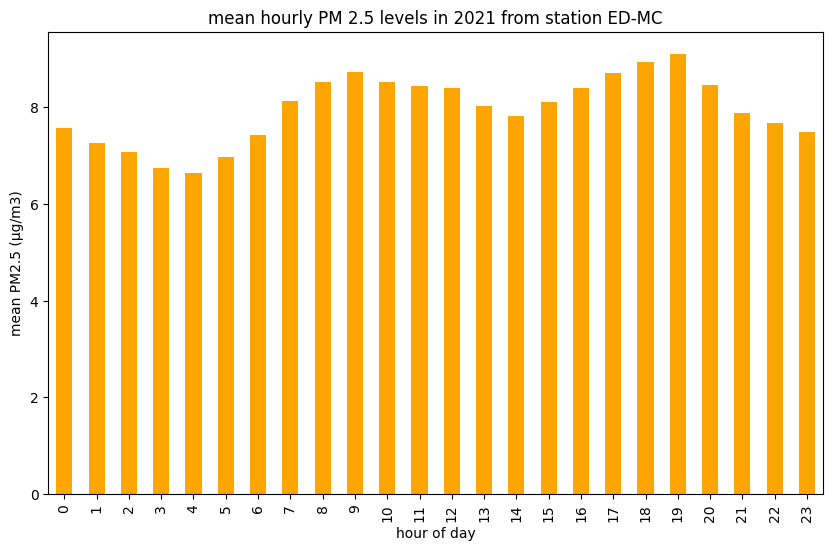

In [127]:
#group the data by time of day (hour) 
#plot the mean pollution level for each hour
hour_mean = station_data.groupby(station_data['Date'].dt.hour)['ED-MC'].mean()
plt.figure(figsize = (10, 6))
hour_mean.plot(kind = 'bar' , color = 'orange')
plt.title('mean hourly PM 2.5 levels in 2021 from station ED-MC')
plt.xlabel('hour of day')
plt.ylabel('mean PM2.5 (µg/m3)')
plt.show()



# interperation from hourly PM2.5 data from 2021
- suggests some variation throughout the day , specifically peaking twice aroudn 9 am and 7 pm
- a correlation with common rush hour times
# (ADD MORE)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

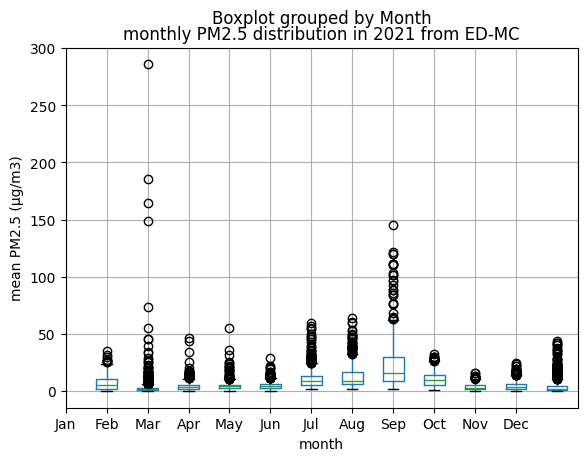

In [128]:
#use box and whiusker plonts for data grouping
station_data['Month'] = station_data['Date'].dt.month

#Box plots for monthly distributions
plt.figure(figsize= (10,5))
station_data.boxplot(column='ED-MC', by ='Month')
plt.title('monthly PM2.5 distribution in 2021 from ED-MC')
plt.xlabel('month')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('mean PM2.5 (µg/m3)')
plt.show

# interps for monthly box plot
# (ADD MORE)

<Figure size 1200x500 with 0 Axes>

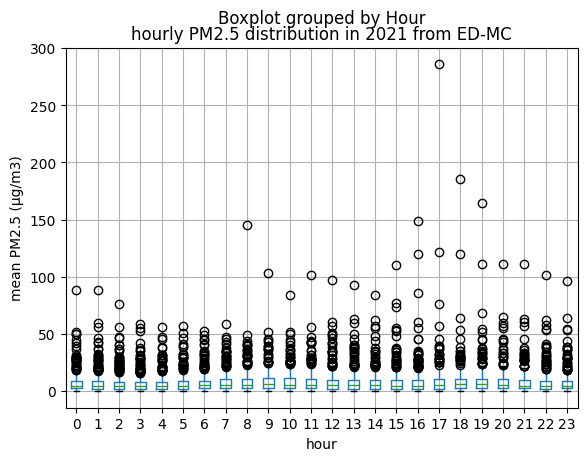

In [132]:
station_data['Hour'] = station_data['Date'].dt.hour
plt.figure(figsize= (12,5))
station_data.boxplot(column='ED-MC', by = 'Hour')
plt.title('hourly PM2.5 distribution in 2021 from ED-MC')
plt.xlabel('hour')
plt.ylabel('mean PM2.5 (µg/m3)')
plt.show()